In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Initial Circle (Calculated Centroid and Average Radius)

In [700]:
gardne_ingress = np.array([-41.7,343.1])
gardne_edgress = np.array([19.5,334.1])
bishop_ingress = np.array([-55.0,485.2])
bishop_edgress = np.array([65.4,467.7])

In [718]:
def centroid(*points):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    length = len(points)
    centroid_x = sum(x_coords)/length
    centroid_y = sum(y_coords)/length
    return [centroid_x, centroid_y]

In [719]:
centr = centroid(gardne_ingress,gardne_edgress,
                 bishop_ingress,bishop_edgress) 

datasets = []
datasets.append(gardne_ingress)
datasets.append(gardne_edgress)
datasets.append(bishop_ingress)
datasets.append(bishop_edgress)

distance = []
for each in datasets:
    dist = np.sqrt((each[0]-centr[0])**2+
                   (each[1]-centr[1])**2)
    distance.append(dist)                         
avgdistance = sum(distance)/len(distance) 

<IPython.core.display.Javascript object>


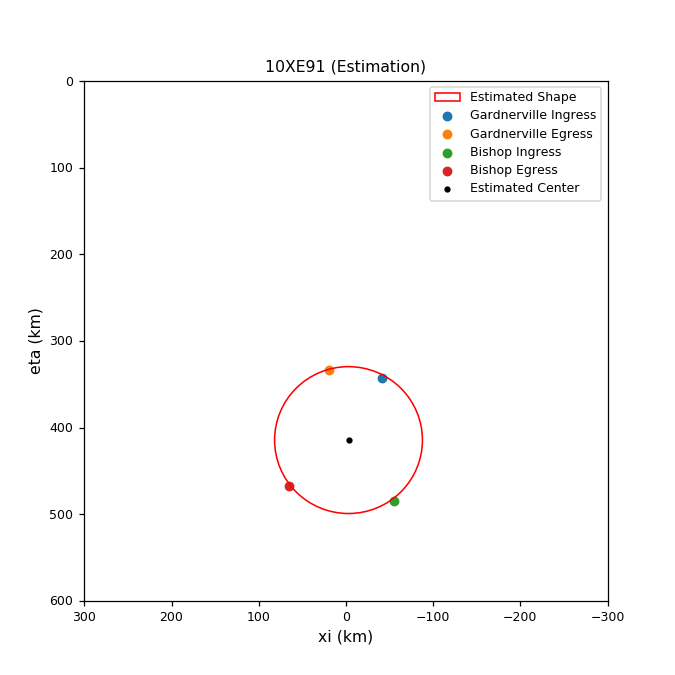

In [720]:
plt.figure(figsize=(6,6))
plt.scatter(gardne_ingress[0],gardne_ingress[1],label='Gardnerville Ingress',s=28)
plt.scatter(gardne_edgress[0],gardne_edgress[1],label='Gardnerville Egress',s=28)
plt.scatter(bishop_ingress[0],bishop_ingress[1],label='Bishop Ingress',s=28)
plt.scatter(bishop_edgress[0],bishop_edgress[1],label='Bishop Egress',s=28)

circle = plt.Circle((centr[0],centr[1]),avgdistance,
                    color='r',fill=False,label='Estimated Shape')
plt.scatter(centr[0],centr[1],marker='.',
            color='black',label='Estimated Center')
plt.gca().add_patch(circle)

plt.xlim(300,-300),plt.ylim(600,000)
plt.legend(loc='upper right',prop={'size':8})
plt.title('10XE91 (Estimation)',fontsize=10)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.ylabel('eta (km)')
plt.xlabel('xi (km)')
plt.savefig('Guessed Circle.png')

# Modeling (Monte Carlo Simulation)

In [769]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [770]:
def Centroid(*points):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    length = len(points)
    centroid_x = sum(x_coords)/length
    centroid_y = sum(y_coords)/length
    return [centroid_x, centroid_y]

In [782]:
def SlopeCal(*points):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    chordslo = ((y_coords[1]-y_coords[0])/
                (x_coords[1]-x_coords[0]))
    return chordslo

In [783]:
def ArrayCal(xcoords,xarray,slope):
    intcep = (xcoords[1]-xcoords[0]*slope)  
    yarray = ((xarray*slope)+intcep)
    return yarray

In [784]:
def Residual(r_average,r_guessed):
    rss = np.sum((r_average-r_guessed)**2)
    return rss

In [785]:
def AvgRadii(x_coords,y_coords,center_x,center_y):
    averadius = np.sqrt(((x_coords-center_x)**2)
                       +((y_coords-center_y)**2))  
    return averadius

In [786]:
def CirCreation(attempts):
    avgradilist   = (AvgRadii(x_coords,y_coords,
                     centroids[0],centroids[1]))
    avgdistance   = (sum(avgradilist)/
                     len(avgradilist))
    x_min,x_max   = (centroids[0] - avgdistance,
                     centroids[0] + avgdistance)
    y_min,y_max   = (centroids[1] - avgdistance,
                     centroids[1] + avgdistance)
    ini_residsum  = Residual(avgradilist,avgdistance)
    random_xlist  = np.random.uniform(x_min,x_max,attempts)  
    random_ylist  = np.random.uniform(y_min,y_max,attempts)
    for random_x,random_y in zip(random_xlist,random_ylist):
        radiilist = AvgRadii(x_coords,y_coords,random_x,random_y)
        radiusavg = sum(radiilist)/len(radiilist)
        residusum = Residual(radiilist,radiusavg)
        if residusum < ini_residsum:
            plt.scatter(random_x,random_y,marker='*',color='dimgrey',s=2)
            circle=plt.Circle((random_x,random_y),radiusavg,
                      color='grey',fill=False,linestyle='-')
            circlelist.append([random_x,random_y,radiusavg])
            plt.gca().add_patch(circle)
            ini_residsum=residusum

In [787]:
def FittingBestCr():
    xcenter = circlelist[-1][0]
    ycenter = circlelist[-1][1]
    radius  = circlelist[-1][2]
    plt.scatter(xcenter,ycenter,marker='.',
                color='r',s=10,label='Center')
    BestCircle = (plt.Circle((xcenter,ycenter),radius,
                  color='r',fill=False,label='Best-fit Circle'))
    plt.gca().add_patch(BestCircle)
    plt.title('10XE91 (Simulation)',fontsize=10)
    plt.legend(loc ='upper right',prop={'size':8})
    plt.savefig('Simulation Results')

In [788]:
def FittingCircle():  
    plt.figure(figsize=(6,6))
    plt.scatter(gardne_ingress[0],gardne_ingress[1],
                 label='Gardnerville Ingress',s=32)
    plt.scatter(gardne_edgress[0],gardne_edgress[1],
                  label='Gardnerville Egress',s=32)
    plt.scatter(bishop_ingress[0],bishop_ingress[1],
                       label='Bishop Ingress',s=32)
    plt.scatter(bishop_edgress[0],bishop_edgress[1],
                        label='Bishop Egress',s=32)
    plt.xlim(300,-300),plt.ylim(600,000)
    plt.rc('xtick',labelsize=8)
    plt.rc('ytick',labelsize=8)
    plt.ylabel('eta (km)')
    plt.xlabel('xi (km)')
    CirCreation(20000)

In [789]:
def FittingChords():
    axes       = plt.gca()
    gardne_ing = np.linspace(gardne_edgress[0],
          axes.get_xlim()[0],axes.get_ylim()[0])
    gardne_end = np.linspace(axes.get_xlim()[1],
           gardne_ingress[0],axes.get_ylim()[0])
    bishop_ing = np.linspace(bishop_edgress[0],
          axes.get_xlim()[0],axes.get_ylim()[0])
    bishop_end = np.linspace(axes.get_xlim()[1],
           bishop_ingress[0],axes.get_ylim()[0])
    plt.plot(gardne_ing,ArrayCal(gardne_ingress,
          gardne_ing,chordslop),color='dimgrey')
    plt.plot(gardne_end,ArrayCal(gardne_edgress,
          gardne_end,chordslop),color='dimgrey')
    plt.plot(bishop_ing,ArrayCal(bishop_ingress,
          bishop_ing,chordslop),color='dimgrey')
    plt.plot(bishop_end,ArrayCal(bishop_edgress,
          bishop_end,chordslop),color='dimgrey',
                     label='Occultation Chords')

In [790]:
x_coords,y_coords,circlelist = [],[],[]
gardne_ingress = np.array([-41.7,343.1])
gardne_edgress = np.array([19.5,334.1])
bishop_ingress = np.array([-55.0,485.2])
bishop_edgress = np.array([65.4,467.7])
datasets  = [gardne_ingress,gardne_edgress,
             bishop_ingress,bishop_edgress]
centroids = Centroid(gardne_ingress,gardne_edgress,
                     bishop_ingress,bishop_edgress)
chordslop = SlopeCal(gardne_ingress,gardne_edgress,
                     bishop_ingress,bishop_edgress)
for each in datasets:
    x_coords.append(each[0])
    y_coords.append(each[1])

<IPython.core.display.Javascript object>


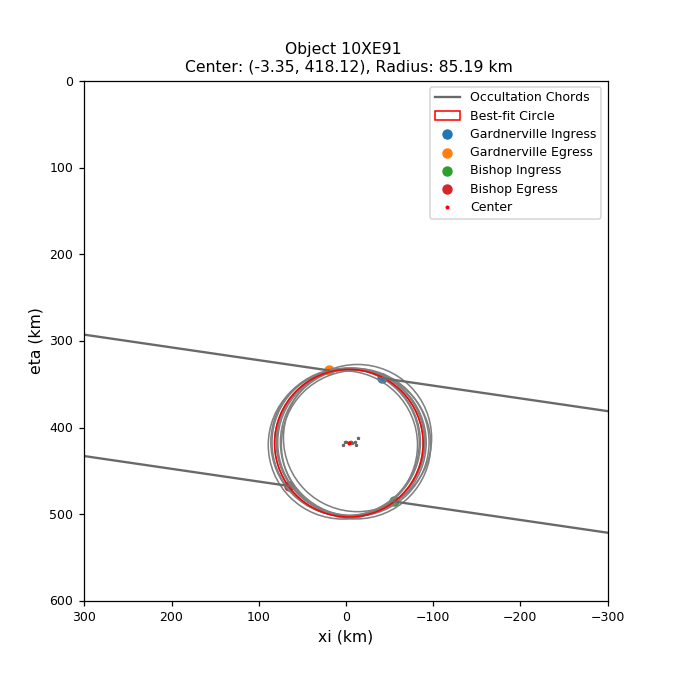

In [804]:
if __name__ == "__main__": 
    FittingCircle()
    FittingChords()
    FittingBestCr()

# Best-fit Circle

<IPython.core.display.Javascript object>


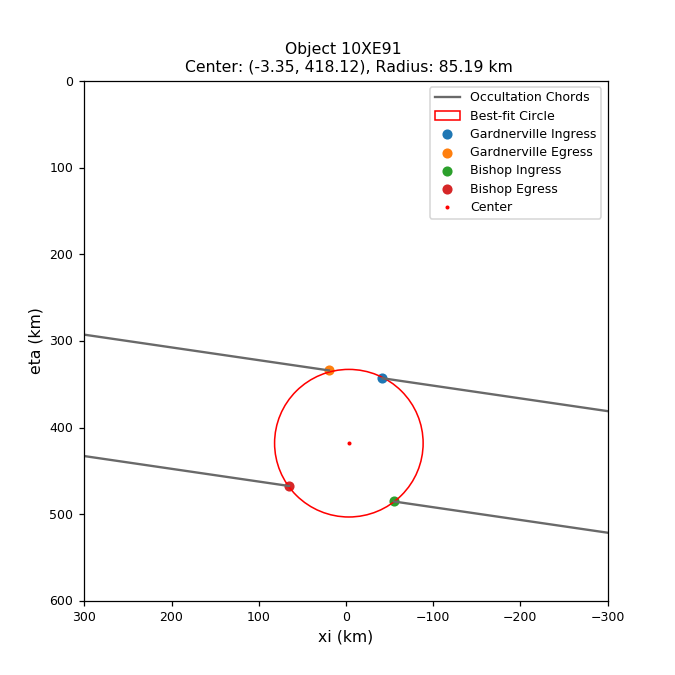

In [805]:
def FittingBestCr():
    xcenter = circlelist[-1][0]
    ycenter = circlelist[-1][1]
    radius  = circlelist[-1][2]
    plt.scatter(xcenter,ycenter,marker='.',
                color='r',s=10,label='Center')
    BestCircle = (plt.Circle((xcenter,ycenter),radius,
                  color='r',fill=False,label='Best-fit Circle'))
    plt.gca().add_patch(BestCircle)
    plt.title(f'Object 10XE91 \n Center: {round(xcenter,2),
              round(ycenter,2)}, Radius: {round(radius,2)} km',fontsize=10)
    plt.legend(loc ='upper right',prop={'size':8})
    plt.savefig('Best-fit Circle.png')

plt.figure(figsize=(6,6))
plt.scatter(gardne_ingress[0],gardne_ingress[1],
             label='Gardnerville Ingress',s=30)
plt.scatter(gardne_edgress[0],gardne_edgress[1],
              label='Gardnerville Egress',s=30)
plt.scatter(bishop_ingress[0],bishop_ingress[1],
                   label='Bishop Ingress',s=30)
plt.scatter(bishop_edgress[0],bishop_edgress[1],
                    label='Bishop Egress',s=30)
plt.xlim(300,-300),plt.ylim(600,000)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.ylabel('eta (km)')
plt.xlabel('xi (km)')
FittingChords()
FittingBestCr()